# 2.数据预处理训练

In [1]:
#基于Numpy、Pandas和matplotlib，对数据集（GeneralBusinessIncome.xlsx）进行分析，其目的是提升学生的数据预处理能力。

In [2]:
#导入数据包
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## 2.1 读入数据

In [3]:
#读入并查看数据前10行

dtype={'TICKER_SYMBOL':str}  #按规定格式读取某列
data = pd.read_csv(\
                   "Data/GeneralBusinessIncome.csv",\
                   dtype = dtype)

data.head(10) #查看前10行


,PARTY_ID,TICKER_SYMBOL,EXCHANGE_CD,PUBLISH_DATE,END_DATE_REP,END_DATE,REPORT_TYPE,FISCAL_PERIOD,MERGED_FLAG,T_REVENUE,...,BASIC_EPS,DILUTED_EPS,OTH_COMPR_INCOME,OTH_EFFECT_CI,AE_EFFECT_CI,T_COMPR_INCOME,COMPR_INC_ATTR_P,COMPR_INC_ATTR_M_S,OTH_EFFECT_PCI,AE_EFFECT_PCI
0,3,000002,XSHE,2009/4/27,2009/3/31,2009/3/31,Q1,3,1,8.164319e+09,...,0.0700,0.0700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,000002,XSHE,2012/10/24,2012/9/30,2011/9/30,Q3,9,1,2.930837e+10,...,0.3300,0.3300,1.342794e+08,NaN,NaN,4.240628e+09,3.718190e+09,5.224388e+08,NaN,NaN
2,3,000002,XSHE,2014/8/18,2014/6/30,2013/6/30,S1,6,1,4.139035e+10,...,0.4100,0.4100,2.611946e+07,NaN,NaN,5.362011e+09,4.582424e+09,7.795864e+08,NaN,NaN
3,3,000002,XSHE,2015/3/31,2014/12/31,2014/12/31,A,12,1,1.460000e+11,...,1.4300,1.4300,6.460081e+07,NaN,NaN,1.935212e+10,1.581769e+10,3.534438e+09,NaN,NaN
4,3,000002,XSHE,2016/3/14,2015/12/31,2014/12/31,A,12,1,1.460000e+11,...,1.4300,1.4300,6.460081e+07,NaN,NaN,1.935212e+10,1.581769e+10,3.534438e+09,NaN,NaN
5,3,000002,XSHE,2015/4/27,2015/3/31,2015/3/31,Q1,3,1,8.894338e+09,...,0.0590,0.0590,-7.253011e+06,NaN,NaN,9.007732e+08,6.429794e+08,2.577938e+08,NaN,NaN
6,3,000002,XSHE,2017/10/27,2027/9/30,2016/9/30,Q3,9,1,1.170000e+11,...,0.7480,0.7480,-1.323910e+08,NaN,NaN,1.115786e+10,8.116765e+09,3.041097e+09,NaN,NaN
7,5,000004,XSHE,2010/4/17,2009/12/31,2008/12/31,A,12,1,4.331482e+07,...,-0.1324,-0.1324,NaN,NaN,NaN,-1.148419e+07,-1.112244e+07,-3.617509e+05,NaN,NaN
8,5,000004,XSHE,2011/12/3,2009/12/31,2008/12/31,A,12,1,4.331482e+07,...,-0.1324,-0.1324,NaN,NaN,NaN,-1.148419e+07,-1.112244e+07,-3.617509e+05,NaN,NaN
9,5,000004,XSHE,2009/8/15,2039/6/30,2009/6/30,S1,6,1,2.817939e+07,...,-0.0117,-0.0117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2 数据理解

In [4]:
#查看数据规模
data.shape 

(208306, 68)

In [5]:
#查看数据基本信息
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208306 entries, 0 to 208305
Data columns (total 68 columns):
PARTY_ID              208306 non-null int64
TICKER_SYMBOL         208306 non-null object
EXCHANGE_CD           208306 non-null object
PUBLISH_DATE          208306 non-null object
END_DATE_REP          208306 non-null object
END_DATE              208306 non-null object
REPORT_TYPE           208306 non-null object
FISCAL_PERIOD         208306 non-null int64
MERGED_FLAG           208306 non-null int64
T_REVENUE             208276 non-null float64
REVENUE               208292 non-null float64
INT_INCOME            3920 non-null float64
PREM_EARNED           3067 non-null float64
COMMIS_INCOME         2592 non-null float64
SPEC_TOR              290 non-null float64
ATOR                  394 non-null float64
T_COGS                208304 non-null float64
COGS                  207986 non-null float64
INT_EXP               4608 non-null float64
COMMIS_EXP            4348 non-null float

In [6]:
#查看数据基本统计量
data.describe()

,PARTY_ID,FISCAL_PERIOD,MERGED_FLAG,T_REVENUE,REVENUE,INT_INCOME,PREM_EARNED,COMMIS_INCOME,SPEC_TOR,ATOR,...,BASIC_EPS,DILUTED_EPS,OTH_COMPR_INCOME,OTH_EFFECT_CI,AE_EFFECT_CI,T_COMPR_INCOME,COMPR_INC_ATTR_P,COMPR_INC_ATTR_M_S,OTH_EFFECT_PCI,AE_EFFECT_PCI
count,2.083060e+05,208306.000000,208306.0,2.082760e+05,2.082920e+05,3.920000e+03,3.067000e+03,2.592000e+03,2.900000e+02,3.940000e+02,...,205857.000000,199371.000000,8.366700e+04,2.180000e+02,9.290000e+02,1.960440e+05,1.958490e+05,1.494770e+05,2.440000e+02,7.340000e+02
mean,5.278100e+04,7.720680,1.0,4.711695e+09,4.703335e+09,1.965393e+08,8.859690e+07,2.216378e+08,1.271596e+08,9.033657e+06,...,0.238963,0.235819,-1.613467e+06,-1.168026e+06,-2.288952e+06,2.635528e+08,2.341820e+08,3.848871e+07,2.957094e+07,8.046370e+06
std,5.039279e+05,3.469145,0.0,4.238955e+10,4.237183e+10,1.126002e+09,1.187500e+09,7.298926e+08,5.458719e+08,8.339485e+07,...,0.434032,0.427521,2.995326e+08,1.768439e+07,4.488878e+07,2.098220e+09,1.863942e+09,3.840470e+08,9.872134e+07,9.813054e+07
min,3.000000e+00,3.000000,1.0,-4.451524e+07,-4.451524e+07,-3.695805e+06,-4.289316e+06,-1.426680e+06,-1.249959e+08,-3.058748e+08,...,-21.857000,-21.857000,-2.023900e+10,-2.610000e+08,-6.030421e+08,-1.830261e+10,-1.615278e+10,-4.342121e+09,-6.421470e+04,-3.717582e+08
25%,8.110000e+02,6.000000,1.0,2.659696e+08,2.648917e+08,3.460088e+06,0.000000e+00,1.209186e+05,0.000000e+00,0.000000e+00,...,0.034100,0.032600,-2.292214e+06,0.000000e+00,-1.000000e+02,1.260156e+07,1.207179e+07,-5.643000e+05,0.000000e+00,-1.000000e-02
50%,2.046000e+03,9.000000,1.0,7.115241e+08,7.088636e+08,1.843963e+07,0.000000e+00,2.365199e+06,0.000000e+00,0.000000e+00,...,0.140000,0.136800,-3.894880e+03,0.000000e+00,0.000000e+00,4.932245e+07,4.701986e+07,4.780997e+05,0.000000e+00,0.000000e+00
75%,3.823100e+04,12.000000,1.0,2.080031e+09,2.071813e+09,8.216946e+07,0.000000e+00,5.023606e+07,0.000000e+00,4.054323e+05,...,0.350000,0.344800,1.384593e+06,0.000000e+00,1.000000e+02,1.469795e+08,1.387557e+08,7.877914e+06,0.000000e+00,1.000000e+02
max,1.000700e+07,12.000000,1.0,2.880000e+12,2.880000e+12,2.669900e+10,3.425631e+10,1.053889e+10,3.679698e+09,1.479845e+09,...,21.560000,21.560000,1.388168e+10,6.365475e+06,4.079899e+08,1.530000e+11,1.430000e+11,2.314600e+10,5.013000e+08,1.628118e+09


## 2.3 缺失数据的识别

In [7]:
#判断数据是否为缺失值
data.isnull()

,PARTY_ID,TICKER_SYMBOL,EXCHANGE_CD,PUBLISH_DATE,END_DATE_REP,END_DATE,REPORT_TYPE,FISCAL_PERIOD,MERGED_FLAG,T_REVENUE,...,BASIC_EPS,DILUTED_EPS,OTH_COMPR_INCOME,OTH_EFFECT_CI,AE_EFFECT_CI,T_COMPR_INCOME,COMPR_INC_ATTR_P,COMPR_INC_ATTR_M_S,OTH_EFFECT_PCI,AE_EFFECT_PCI
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208301,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,True,False,False,True,True,True
208302,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,True,True
208303,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,True
208304,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,True


In [8]:
# 判断各变量中是否存在缺失值
data.isnull().any(axis = 0)

PARTY_ID              False
TICKER_SYMBOL         False
EXCHANGE_CD           False
PUBLISH_DATE          False
END_DATE_REP          False
                      ...  
T_COMPR_INCOME         True
COMPR_INC_ATTR_P       True
COMPR_INC_ATTR_M_S     True
OTH_EFFECT_PCI         True
AE_EFFECT_PCI          True
Length: 68, dtype: bool

In [9]:
# 查看各变量中缺失值的数量
print(data.isnull().sum(axis = 0))

PARTY_ID                   0
TICKER_SYMBOL              0
EXCHANGE_CD                0
PUBLISH_DATE               0
END_DATE_REP               0
                       ...  
T_COMPR_INCOME         12262
COMPR_INC_ATTR_P       12457
COMPR_INC_ATTR_M_S     58829
OTH_EFFECT_PCI        208062
AE_EFFECT_PCI         207572
Length: 68, dtype: int64


In [10]:
# 查看各变量中缺失值的比例
data.isnull().sum(axis = 0)/data.shape[0]

PARTY_ID              0.000000
TICKER_SYMBOL         0.000000
EXCHANGE_CD           0.000000
PUBLISH_DATE          0.000000
END_DATE_REP          0.000000
                        ...   
T_COMPR_INCOME        0.058865
COMPR_INC_ATTR_P      0.059801
COMPR_INC_ATTR_M_S    0.282416
OTH_EFFECT_PCI        0.998829
AE_EFFECT_PCI         0.996476
Length: 68, dtype: float64

## 2.4 缺失值的处理方法1——删除法

In [11]:
#删除观测——如删除“T_COMPR_INCOME”变量中所对应的缺失观测
data_new1 = data.drop(\
                      labels = data.index[data['T_COMPR_INCOME'].isnull()],\
                      axis=0)
data_new1.isnull().sum(axis = 0)

#删除字段——如删除缺失率非常高的“AE_EFFECT_PCI”变量
# data_new2 = data.drop(\
#                       labels = "AE_EFFECT_PCI", axis = 1,\
#                       inplace=False)
# data_new2.head(10)

PARTY_ID                   0
TICKER_SYMBOL              0
EXCHANGE_CD                0
PUBLISH_DATE               0
END_DATE_REP               0
                       ...  
T_COMPR_INCOME             0
COMPR_INC_ATTR_P         197
COMPR_INC_ATTR_M_S     46569
OTH_EFFECT_PCI        195800
AE_EFFECT_PCI         195310
Length: 68, dtype: int64

## 2.5 缺失值的处理方法2——替换法

In [12]:
#分别用中位数和平均值替换本列的缺失值
data_new3 = data.fillna(value =\
                        {'T_COMPR_INCOME':data['T_COMPR_INCOME'].median(),\
                         'COMPR_INC_ATTR_P':data['COMPR_INC_ATTR_P'].mean()},\
                        inplace = False)
#查看替换效果（缺失情况）
data_new3.isnull().sum(axis = 0)

PARTY_ID                   0
TICKER_SYMBOL              0
EXCHANGE_CD                0
PUBLISH_DATE               0
END_DATE_REP               0
                       ...  
T_COMPR_INCOME             0
COMPR_INC_ATTR_P           0
COMPR_INC_ATTR_M_S     58829
OTH_EFFECT_PCI        208062
AE_EFFECT_PCI         207572
Length: 68, dtype: int64

## 2.6 异常值的判断方法1——箱形图法

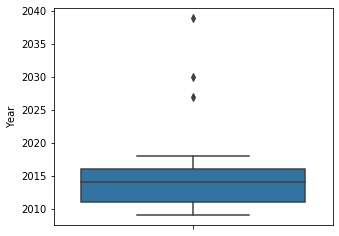

In [13]:
#导入seaborn模块
import seaborn as sns

#提取'END_DATE_REP'列的年份，并在data表中新建一列'Year'
data['Year'] = pd.DatetimeIndex(data['END_DATE_REP']).year

#绘制箱线图
f,ax=plt.subplots(figsize=(5,4))
sns.boxplot(y='Year',data = data,ax=ax)
plt.show()

## 2.7 异常值的判断方法2——简单统计

In [14]:
#异常值的判断方法2——简单统计
data.describe() 

,PARTY_ID,FISCAL_PERIOD,MERGED_FLAG,T_REVENUE,REVENUE,INT_INCOME,PREM_EARNED,COMMIS_INCOME,SPEC_TOR,ATOR,...,DILUTED_EPS,OTH_COMPR_INCOME,OTH_EFFECT_CI,AE_EFFECT_CI,T_COMPR_INCOME,COMPR_INC_ATTR_P,COMPR_INC_ATTR_M_S,OTH_EFFECT_PCI,AE_EFFECT_PCI,Year
count,2.083060e+05,208306.000000,208306.0,2.082760e+05,2.082920e+05,3.920000e+03,3.067000e+03,2.592000e+03,2.900000e+02,3.940000e+02,...,199371.000000,8.366700e+04,2.180000e+02,9.290000e+02,1.960440e+05,1.958490e+05,1.494770e+05,2.440000e+02,7.340000e+02,208306.000000
mean,5.278100e+04,7.720680,1.0,4.711695e+09,4.703335e+09,1.965393e+08,8.859690e+07,2.216378e+08,1.271596e+08,9.033657e+06,...,0.235819,-1.613467e+06,-1.168026e+06,-2.288952e+06,2.635528e+08,2.341820e+08,3.848871e+07,2.957094e+07,8.046370e+06,2013.657734
std,5.039279e+05,3.469145,0.0,4.238955e+10,4.237183e+10,1.126002e+09,1.187500e+09,7.298926e+08,5.458719e+08,8.339485e+07,...,0.427521,2.995326e+08,1.768439e+07,4.488878e+07,2.098220e+09,1.863942e+09,3.840470e+08,9.872134e+07,9.813054e+07,2.635750
min,3.000000e+00,3.000000,1.0,-4.451524e+07,-4.451524e+07,-3.695805e+06,-4.289316e+06,-1.426680e+06,-1.249959e+08,-3.058748e+08,...,-21.857000,-2.023900e+10,-2.610000e+08,-6.030421e+08,-1.830261e+10,-1.615278e+10,-4.342121e+09,-6.421470e+04,-3.717582e+08,2009.000000
25%,8.110000e+02,6.000000,1.0,2.659696e+08,2.648917e+08,3.460088e+06,0.000000e+00,1.209186e+05,0.000000e+00,0.000000e+00,...,0.032600,-2.292214e+06,0.000000e+00,-1.000000e+02,1.260156e+07,1.207179e+07,-5.643000e+05,0.000000e+00,-1.000000e-02,2011.000000
50%,2.046000e+03,9.000000,1.0,7.115241e+08,7.088636e+08,1.843963e+07,0.000000e+00,2.365199e+06,0.000000e+00,0.000000e+00,...,0.136800,-3.894880e+03,0.000000e+00,0.000000e+00,4.932245e+07,4.701986e+07,4.780997e+05,0.000000e+00,0.000000e+00,2014.000000
75%,3.823100e+04,12.000000,1.0,2.080031e+09,2.071813e+09,8.216946e+07,0.000000e+00,5.023606e+07,0.000000e+00,4.054323e+05,...,0.344800,1.384593e+06,0.000000e+00,1.000000e+02,1.469795e+08,1.387557e+08,7.877914e+06,0.000000e+00,1.000000e+02,2016.000000
max,1.000700e+07,12.000000,1.0,2.880000e+12,2.880000e+12,2.669900e+10,3.425631e+10,1.053889e+10,3.679698e+09,1.479845e+09,...,21.560000,1.388168e+10,6.365475e+06,4.079899e+08,1.530000e+11,1.430000e+11,2.314600e+10,5.013000e+08,1.628118e+09,2039.000000


## 2.8 异常值的处理——删除法

In [15]:
#异常值的处理——删除法
data_new4 = data.drop(\
                      labels = data.index[data['Year']>2021],\
                      axis=0)  #将‘Year’列大于2021的值删除
data_new4.describe() 

,PARTY_ID,FISCAL_PERIOD,MERGED_FLAG,T_REVENUE,REVENUE,INT_INCOME,PREM_EARNED,COMMIS_INCOME,SPEC_TOR,ATOR,...,DILUTED_EPS,OTH_COMPR_INCOME,OTH_EFFECT_CI,AE_EFFECT_CI,T_COMPR_INCOME,COMPR_INC_ATTR_P,COMPR_INC_ATTR_M_S,OTH_EFFECT_PCI,AE_EFFECT_PCI,Year
count,2.083030e+05,208303.000000,208303.0,2.082730e+05,2.082890e+05,3.920000e+03,3.067000e+03,2.592000e+03,2.900000e+02,3.940000e+02,...,199368.000000,8.366500e+04,2.180000e+02,9.290000e+02,1.960420e+05,1.958470e+05,1.494750e+05,2.440000e+02,7.340000e+02,208303.000000
mean,5.278176e+04,7.720705,1.0,4.711165e+09,4.702805e+09,1.965393e+08,8.859690e+07,2.216378e+08,1.271596e+08,9.033657e+06,...,0.235818,-1.612018e+06,-1.168026e+06,-2.288952e+06,2.634925e+08,2.341371e+08,3.846855e+07,2.957094e+07,8.046370e+06,2013.657470
std,5.039315e+05,3.469152,0.0,4.238914e+10,4.237142e+10,1.126002e+09,1.187500e+09,7.298926e+08,5.458719e+08,8.339485e+07,...,0.427523,2.995358e+08,1.768439e+07,4.488878e+07,2.098085e+09,1.863865e+09,3.839710e+08,9.872134e+07,9.813054e+07,2.634778
min,3.000000e+00,3.000000,1.0,-4.451524e+07,-4.451524e+07,-3.695805e+06,-4.289316e+06,-1.426680e+06,-1.249959e+08,-3.058748e+08,...,-21.857000,-2.023900e+10,-2.610000e+08,-6.030421e+08,-1.830261e+10,-1.615278e+10,-4.342121e+09,-6.421470e+04,-3.717582e+08,2009.000000
25%,8.110000e+02,6.000000,1.0,2.659696e+08,2.648943e+08,3.460088e+06,0.000000e+00,1.209186e+05,0.000000e+00,0.000000e+00,...,0.032600,-2.292214e+06,0.000000e+00,-1.000000e+02,1.260156e+07,1.207112e+07,-5.643243e+05,0.000000e+00,-1.000000e-02,2011.000000
50%,2.046000e+03,9.000000,1.0,7.115082e+08,7.088616e+08,1.843963e+07,0.000000e+00,2.365199e+06,0.000000e+00,0.000000e+00,...,0.136800,-3.894880e+03,0.000000e+00,0.000000e+00,4.932234e+07,4.701986e+07,4.779129e+05,0.000000e+00,0.000000e+00,2014.000000
75%,3.823100e+04,12.000000,1.0,2.079892e+09,2.071535e+09,8.216946e+07,0.000000e+00,5.023606e+07,0.000000e+00,4.054323e+05,...,0.344800,1.384593e+06,0.000000e+00,1.000000e+02,1.469787e+08,1.387438e+08,7.877565e+06,0.000000e+00,1.000000e+02,2016.000000
max,1.000700e+07,12.000000,1.0,2.880000e+12,2.880000e+12,2.669900e+10,3.425631e+10,1.053889e+10,3.679698e+09,1.479845e+09,...,21.560000,1.388168e+10,6.365475e+06,4.079899e+08,1.530000e+11,1.430000e+11,2.314600e+10,5.013000e+08,1.628118e+09,2018.000000


## 2.9 冗余数据的判断

In [16]:
#判断数据中是否存在重复观测
data.duplicated().any()

False

In [17]:
#查看数据中存在多少重复观测
data.duplicated().sum(axis = 0)

0

In [18]:
#基于指定列查看存在多少重复值
data.duplicated(subset= ['TICKER_SYMBOL']).sum(axis = 0)

204807

## 2.10 冗余数据的处理——删除法

In [19]:
# 默认情况下，对数据的所有变量进行判断
# data.drop_duplicates(inplace = False)

#基于指定变量进行重复值的删除
data_afterdrop = data.drop_duplicates(\
                                      subset= ['TICKER_SYMBOL'],inplace = False)

#查看指定列删除重复值后的情况
data_afterdrop.duplicated(subset= ['TICKER_SYMBOL']).sum(axis = 0)

0

## 2.11 数据透视表

In [20]:
pd.pivot_table(data,index = ['EXCHANGE_CD','TICKER_SYMBOL'],\
               values = ['REVENUE'],\
               columns = ['Year','REPORT_TYPE'],\
               aggfunc = [np.mean],\
               fill_value=0,\
               margins=1)     

    #每个pivot_table必须拥有一个index
    #Values可以对需要的数据进行筛选
    #columns不是一个必要参数，作为分割数据的可选方式
    #aggfunc设置对数据聚合时进行的函数操作
    #fill_value填充空值
    #margins=True进行汇总

mean                              \
                                REVENUE                               
Year                               2009                               
REPORT_TYPE                           A            Q1            Q3   
EXCHANGE_CD TICKER_SYMBOL                                             
XSHE        000002         4.493640e+10  7.282377e+09  2.604288e+10   
            000004         5.169771e+07  9.783159e+06  3.508059e+07   
            000005         7.595637e+07  1.453885e+07  6.047343e+07   
            000006         1.435490e+09  4.480898e+08  7.545114e+08   
            000007         1.461505e+08  3.853217e+07  1.108533e+08   
...                                 ...           ...           ...   
XSHG        900951         2.122752e+08  6.143761e+07  1.920735e+08   
            900953         4.686200e+09  1.109782e+09  3.574163e+09   
            900956         2.377608e+09  6.935005e+08  2.143671e+09   
            900957         1.332033e+08  2.651588e+07  1.023620e+08   
All                        4.817358e+09  1.255527e+09  4.107365e+09   

                                                                     \
                                                                      
Year                                             2010                 
REPORT_TYPE                          S1             A            Q1   
EXCHANGE_CD TICKER_SYMBOL                                             
XSHE        000002         1.953183e+10  4.979743e+10  8.164319e+09   
            000004         2.188545e+07  9.570605e+07  1.377620e+07   
            000005         3.179090e+07  1.058870e+08  1.084260e+07   
            000006         6.448922e+08  2.093985e+09  2.401522e+08   
            000007         7.180686e+07  1.383016e+08  3.165077e+07   
...                                 ...           ...           ...   
XSHG        900951         1.365177e+08  1.254057e+08  3.937151e+05   
            900953         2.390337e+09  5.848649e+09  1.486266e+09   
            900956         1.461773e+09  3.306693e+09  8.900773e+08   
            900957         5.707863e+07  1.362354e+08  2.733867e+07   
All                        2.656606e+09  5.089649e+09  1.358800e+09   

                                                                     \
                                                                      
Year                                                           2011   
REPORT_TYPE                          Q3            S1             A   
EXCHANGE_CD TICKER_SYMBOL                                             
XSHE        000002         2.596213e+10  1.928749e+10  6.124830e+10   
            000004         7.175160e+07  3.260945e+07  1.029176e+08   
            000005         3.424466e+07  2.082265e+07  1.003845e+08   
            000006         8.503051e+08  6.291601e+08  2.464005e+09   
            000007         1.010116e+08  6.407487e+07  1.543158e+08   
...                                 ...           ...           ...   
XSHG        900951         7.129340e+07  2.633910e+07  5.511459e+08   
            900953         4.347019e+09  3.014896e+09  6.004609e+09   
            900956         2.763428e+09  1.800832e+09  3.881349e+09   
            900957         1.061206e+08  7.447632e+07  7.017188e+07   
All                        4.455873e+09  2.884905e+09  6.178048e+09   

                                         ...                              \
                                         ...                               
Year                                     ...          2016          2017   
REPORT_TYPE                          Q1  ...            S1             A   
EXCHANGE_CD TICKER_SYMBOL                ...                               
XSHE        000002         7.737613e+09  ...  6.253105e+10  2.415000e+11   
            000004         2.152583e+07  ...  8.084815e+07  2.131379e+08   
            000005         1.054584e+07  ...  1.131190e+08  5.063928e+08   
            0000

## 2.12 多级索引——创建和行列转换

In [21]:
#生成多级索引
data_new5 = pd.pivot_table(data,\
                           index = ['EXCHANGE_CD','TICKER_SYMBOL'],\
                           values = ['REVENUE'],\
                           columns = ['REPORT_TYPE'],\
                           aggfunc = [np.mean])
data_new5

# #unstack的使用
data_new5.unstack(level=0)
# data_new5.unstack(level=1)

# #stack的使用
data_new5.unstack().stack()

mean                              \
                                REVENUE                               
REPORT_TYPE                           A            Q1            Q3   
EXCHANGE_CD TICKER_SYMBOL                                             
XSHE        000002         1.301194e+11  1.167978e+10  5.780922e+10   
            000004         1.189340e+08  1.815310e+07  7.847307e+07   
            000005         1.413455e+08  2.832896e+07  9.136180e+07   
            000006         2.979404e+09  5.536539e+08  1.377707e+09   
            000007         1.642121e+08  2.721418e+07  9.729163e+07   
...                                 ...           ...           ...   
XSHG        900948         2.178333e+10  4.539448e+09  1.584087e+10   
            900951         6.786424e+08  1.693576e+08  5.014423e+08   
            900953         5.199957e+09  1.443203e+09  3.955815e+09   
            900956         3.620509e+09  9.549499e+08  2.952143e+09   
            900957         6.607291e+07  1.794264e+07  4.706001e+07   

                                         
                                         
REPORT_TYPE                          S1  
EXCHANGE_CD TICKER_SYMBOL                
XSHE        000002         4.027649e+10  
            000004         4.016217e+07  
            000005         5.226145e+07  
            000006         1.117989e+09  
            000007         5.864122e+07  
...                                 ...  
XSHG        900948         9.688386e+09  
            900951         3.465413e+08  
            900953         2.806797e+09  
            900956         2.047723e+09  
            900957         3.123896e+07  

[3499 rows x 4 columns]

## 2.13 多级索引——取值与切片

In [22]:
#生成多级索引——数据透视表
data_new7 = pd.pivot_table(data,index = ['EXCHANGE_CD','TICKER_SYMBOL'],\
               values = ['REVENUE'],\
               columns = ['Year'],\
               aggfunc = [np.mean])

#loc
data_new7.loc['XSHE']  #取出索引为‘XSHE'的所有数据
# data_new7.loc[('XSHE','000002'):('XSHE','000007')]  #取出'000002'-'000007'之间的数据

#iloc
data_new7.iloc[0:2,0:3]  #取出前两行，前三列的数据
# data_new7.iloc[:,0:3]  #取出前3列的数据

#IndexSlice
idx = pd.IndexSlice
data_new7.loc[idx['XSHE'],idx['000002']]  #取出代码为‘000002’公司历年的收入数据

               Year
mean  REVENUE  2009    2.444837e+10
               2010    2.832263e+10
               2011    2.830197e+10
               2012    3.990592e+10
               2013    5.550034e+10
               2014    6.417554e+10
               2015    9.494646e+10
               2016    9.062260e+10
               2017    1.111152e+11
               2018    2.470742e+10
               2027    1.170000e+11
               2030    7.504970e+09
               2039             NaN
Name: (XSHE, 000002), dtype: float64